In [1]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
img = cv2.imread("D:/23108111/HH1.jpg")
if img is None:
    print("Error: Image not found or unable to read.")

In [3]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
resized = cv2.resize(img, (300, 300))

In [6]:
resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

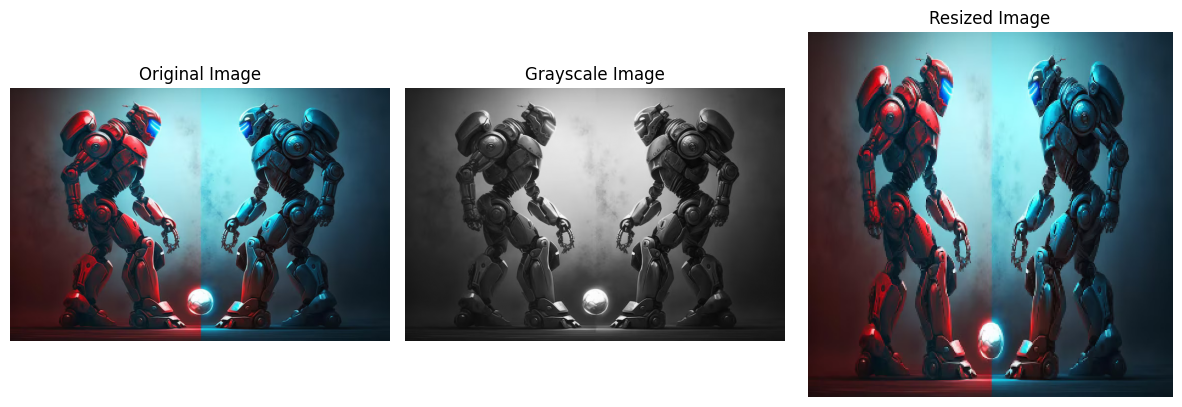

In [7]:
plt.figure(figsize=(12, 4)) 
plt.subplot(1, 3, 1) 
plt.title("Original Image") 
plt.imshow(img_rgb) 
plt.axis('off') 
plt.subplot(1, 3, 2) 
plt.title("Grayscale Image") 
plt.imshow(gray, cmap='gray') 
plt.axis('off') 
plt.subplot(1, 3, 3) 
plt.title("Resized Image") 
plt.imshow(resized_rgb) 
plt.axis('off') 
plt.tight_layout() 
plt.show()

In [8]:
cv2.imwrite('D:/23108111/gray_sample.jpg', gray) 
cv2.imwrite('D:/23108111/resized_sample.jpg', resized)
print("Images saved as 'gray_sample.jpg' and 'resized_sample.jpg")

Images saved as 'gray_sample.jpg' and 'resized_sample.jpg


In [9]:
# 1. Image Quality Enhancer for Social Media
img2 = cv2.imread("D:/23108111/HH2.jpg")

In [10]:
def auto_brightness_contrast(image, clip_hist_percent=25):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    hist = cv2.calcHist([gray],[0],None,[256],[0,256]).flatten() 
    acc = np.cumsum(hist) 
    clip = clip_hist_percent * (acc[-1] / 100.0) / 2.0 
    min_gray = np.searchsorted(acc, clip) 
    max_gray = np.searchsorted(acc, acc[-1] - clip) 
    alpha = 255 / (max_gray - min_gray + 1e-5) 
    beta = -min_gray * alpha 
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta) 
enhanced = auto_brightness_contrast(img2) 
resized = cv2.resize(enhanced, (1080, 1080))

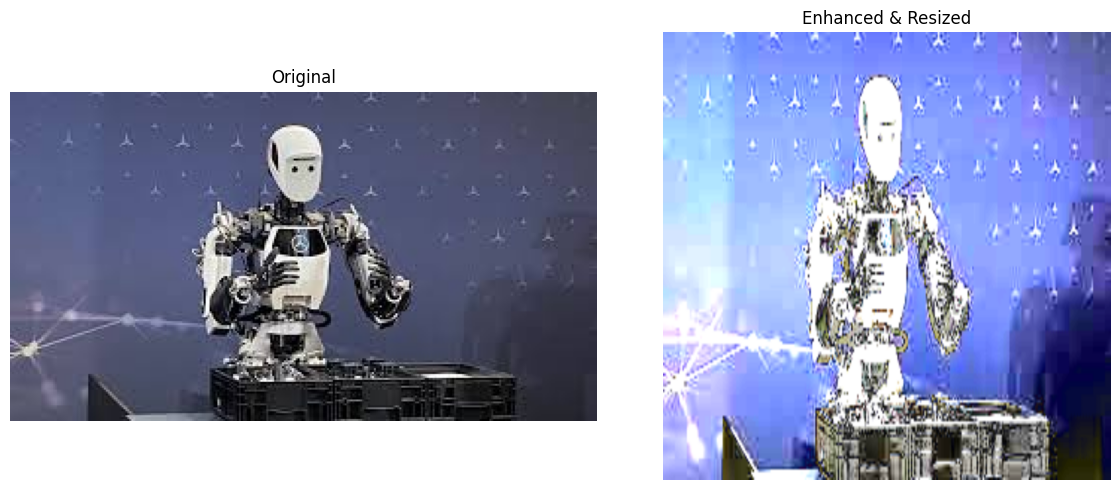

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 
ax[0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)) 
ax[0].set_title("Original") 
ax[1].imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)) 
ax[1].set_title("Enhanced & Resized") 
for a in ax:
    a.axis('off') 
plt.tight_layout() 
plt.show()

In [12]:
# 2. Security Camera Grayscale Archiver
color_image = cv2.imread("D:/23108111/HH3.jpeg")
if color_image is None:
    print("Error: Unable to read the image.")

In [13]:
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

In [14]:
cv2.imwrite('D:/23108111/gray_sample2.jpg', gray_image)
print("Image saved")

Image saved


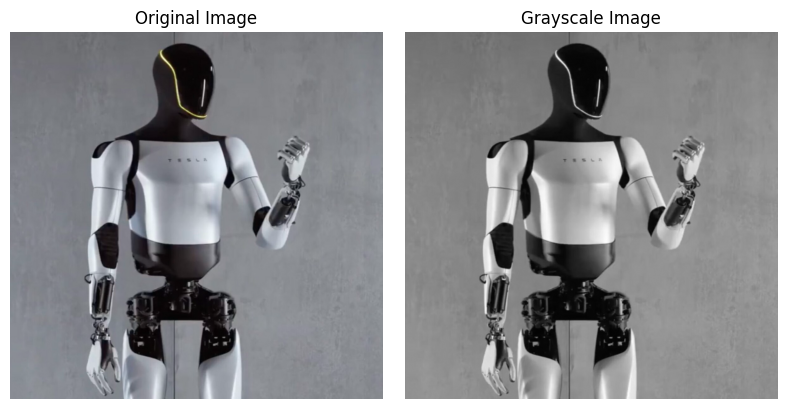

In [15]:
plt.figure(figsize=(12, 4)) 
plt.subplot(1, 3, 1) 
plt.title("Original Image") 
plt.imshow(color_image) 
plt.axis('off') 
plt.subplot(1, 3, 2) 
plt.title("Grayscale Image") 
plt.imshow(gray_image, cmap='gray') 
plt.axis('off') 
plt.tight_layout() 
plt.show()

In [16]:
# 3. Image Comparison for Duplicates
img2 = cv2.imread("D:/23108111/HH2.jpg") 
img3 = cv2.imread("D:/23108111/HH3.jpeg")
img2 = cv2.resize(img2, (500, 500)) 
img3 = cv2.resize(img3, (500, 500))

In [17]:
gray1 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 
gray2 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

In [18]:
from skimage.metrics import structural_similarity as ssim
mse = np.mean((gray1 - gray2) ** 2) 
ssim_score, _ = ssim(gray1, gray2, full=True) 
print(f"MSE: {mse:.2f}") 
print(f"SSIM: {ssim_score:.4f}")

MSE: 109.21
SSIM: 0.4841


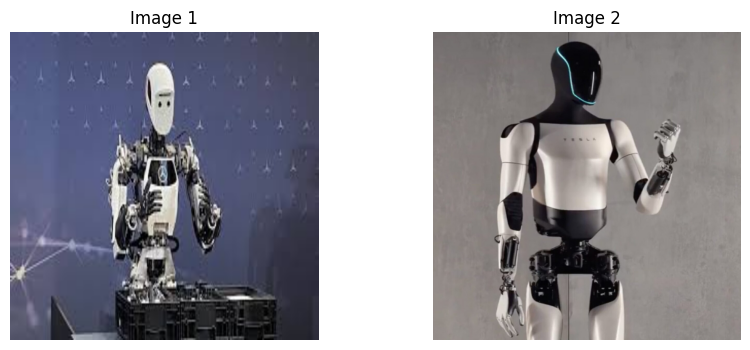

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4)) 
ax[0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)) 
ax[0].set_title("Image 1") 
ax[1].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)) 
ax[1].set_title("Image 2") 
for a in ax:
    a.axis('off') 
plt.show()

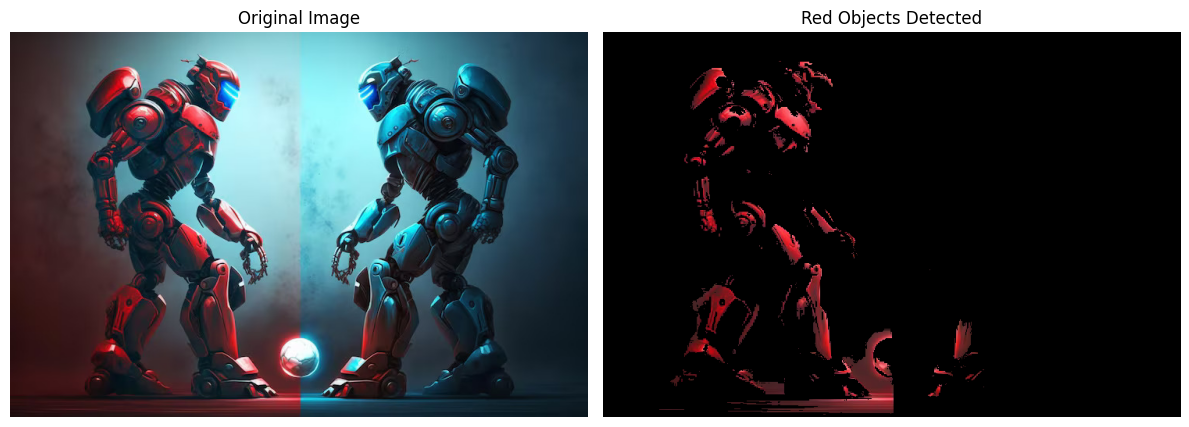

In [20]:
# 4. Color Filter for Object Detection
image = cv2.imread("D:/23108111/HH1.jpg")
if image is None:
    print("Error: Couldn't read the image.")
else:
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
    lower_red1 = np.array([0, 120, 70]) 
    upper_red1 = np.array([10, 255, 255]) 
    lower_red2 = np.array([170, 120, 70]) 
    upper_red2 = np.array([180, 255, 255])
    mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1) 
    mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2) 
    red_mask = mask1 + mask2
    red_detected = cv2.bitwise_and(image, image, mask=red_mask)
    plt.figure(figsize=(12, 6)) 
    plt.subplot(1, 2, 1) 
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
    plt.title("Original Image") 
    plt.axis('off') 
    plt.subplot(1, 2, 2) 
    plt.imshow(cv2.cvtColor(red_detected, cv2.COLOR_BGR2RGB)) 
    plt.title("Red Objects Detected") 
    plt.axis('off') 
    plt.tight_layout() 
    plt.show()

In [21]:
# 5. Blurring License Plates for Privacy
image = cv2.imread("D:/23108111/HH4.jpg")

In [22]:
license_plate_rois = [(75, 90, 110, 40)]

In [23]:
height, width = image.shape[:2]

for (x, y, w, h) in license_plate_rois:
    if x < 0 or y < 0 or x + w > width or y + h > height:
        print(f"Skipping ROI {(x, y, w, h)} because it's outside the image boundaries.") 
        continue
    roi = image[y:y+h, x:x+w] 
    blurred_roi = cv2.GaussianBlur(roi, (51, 51), 0) 
    image[y:y+h, x:x+w] = blurred_roi

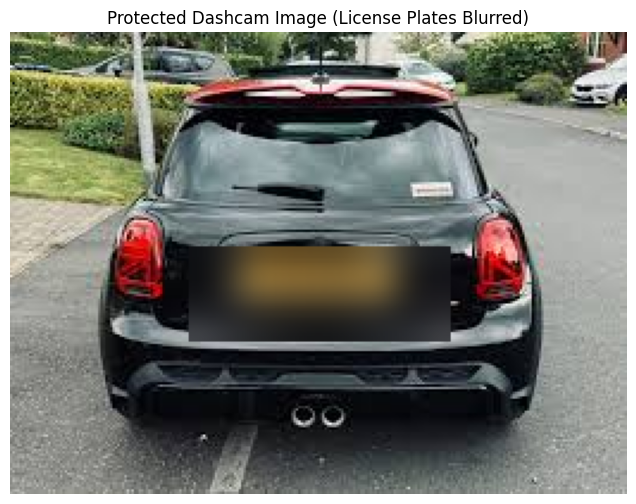

In [24]:
plt.figure(figsize=(10, 6)) 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
plt.title("Protected Dashcam Image (License Plates Blurred)") 
plt.axis('off') 
plt.show()

In [25]:
cv2.imwrite("D:/23108111/protected_dashcam.jpg", image) 
print("image saved")

image saved


In [26]:
# Custom Image Watermarking Tool
img = cv2.imread("D:/23108111/HH1.jpg")
watermark = cv2.imread("D:/23108111/HH6.png",cv2.IMREAD_UNCHANGED)
if img is None or watermark is None:
    print("Error: Unable to read images.")

In [27]:
h_img, w_img = img.shape[:2]
scale_width = int(w_img * 0.3)
scale_height = int(watermark.shape[0] * (scale_width / watermark.shape[1]))
watermark = cv2.resize(watermark, (scale_width, scale_height))
h_wm, w_wm = watermark.shape[:2]
x = (w_img - w_wm) // 2
y = (h_img - h_wm) // 2
overlay = watermark[:, :, :3]
alpha = watermark[:, :, 3] / 255.0
opacity = 0.8
for c in range(3):
    img[y:y+h_wm, x:x+w_wm, c] = (
        (1 - alpha * opacity) * img[y:y+h_wm, x:x+w_wm, c] +
        (alpha * opacity) * overlay[:, :, c]
    )

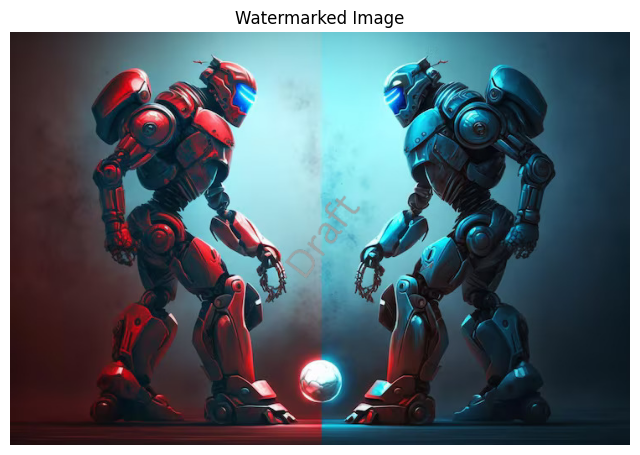

In [28]:
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Watermarked Image")
plt.axis("off")
plt.show()

In [29]:
cv2.imwrite("D:/23108111/watermarked_output.jpg", img)
print("Watermarked image saved.")

Watermarked image saved.


In [30]:
# Basic OCR Pipeline (Conceptual)
img = cv2.imread("D:/23108111/HH5.jpeg")
if img is None:
    print("Error: Image not found.")

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [32]:
denoised = cv2.medianBlur(gray, 3)

In [33]:
thresh = cv2.adaptiveThreshold(denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

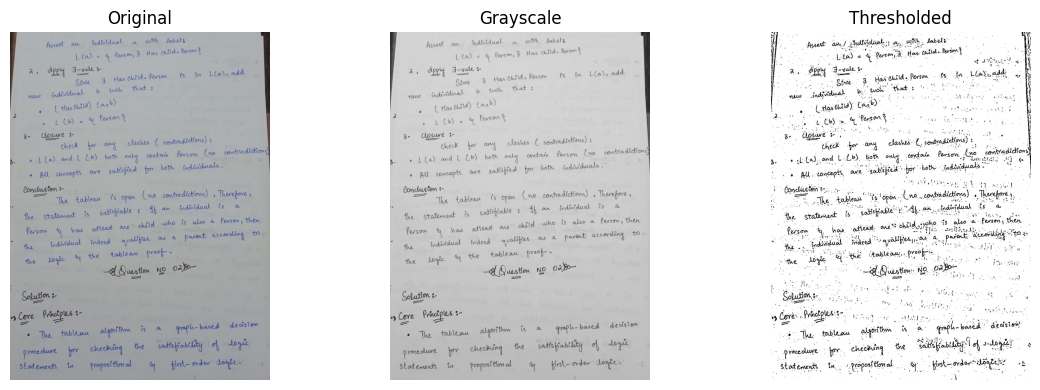

In [34]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Thresholded")
plt.imshow(thresh, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()

In [35]:
cv2.imwrite("D:/23108111/ocr_ready.jpg", thresh)
print("OCR-ready image saved.")

OCR-ready image saved.


In [36]:
# Collage Generator Using Python and OpenCV
img1 = cv2.imread("D:/23108111/HH1.jpg")
img2 = cv2.imread("D:/23108111/HH2.jpg")
img3 = cv2.imread("D:/23108111/HH3.jpeg")
img4 = cv2.imread("D:/23108111/HH4.jpg")

In [37]:
img1 = cv2.resize(img1, (400,400))
img2 = cv2.resize(img2, (400,400))
img3 = cv2.resize(img3, (400,400))
img4 = cv2.resize(img4, (400,400))

In [38]:
top_row = np.hstack((img1, img2))
bottom_row = np.hstack((img3, img4))
collage = np.vstack((top_row, bottom_row))

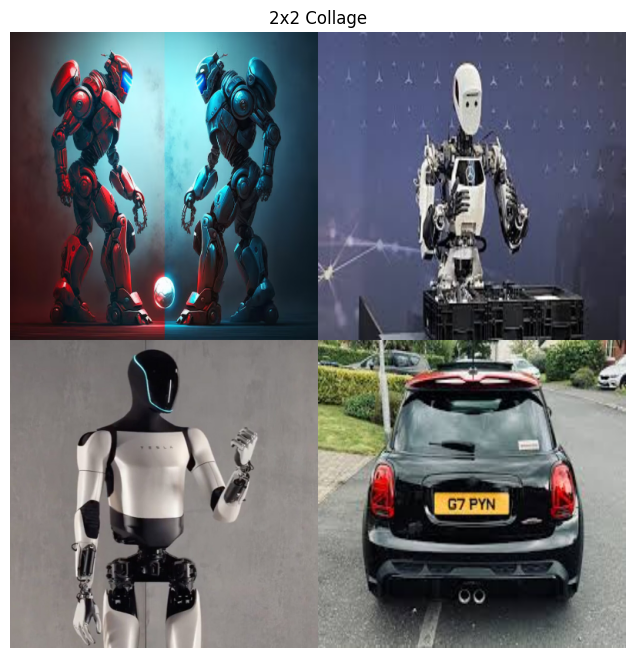

In [39]:
plt.figure(figsize=(8,8))
plt.title("2x2 Collage")
plt.imshow(cv2.cvtColor(collage, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [40]:
cv2.imwrite("D:/23108111/collage_output.jpg", collage)
print("Collage saved successfully.")

Collage saved successfully.


In [41]:
# Color-to-Grayscale Converter for Print Shops
import os

input_folder = "D:/23108111"
output_folder = "D:/23108111"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for file in os.listdir(input_folder):
    if file.endswith((".jpg", ".png", ".jpeg")):
        img = cv2.imread(os.path.join(input_folder, file))
        if img is None:
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        name, ext = os.path.splitext(file)
        new_name = name + "_bw" + ext
        cv2.imwrite(os.path.join(output_folder, new_name), gray)
        print(f"{new_name} saved.")

print("All images converted to grayscale.")

collage_output_bw.jpg saved.
gray_sample_bw.jpg saved.
gray_sample2_bw.jpg saved.
HH1_bw.jpg saved.
HH2_bw.jpg saved.
HH3_bw.jpeg saved.
HH4_bw.jpg saved.
HH5_bw.jpeg saved.
HH6_bw.png saved.
ocr_ready_bw.jpg saved.
protected_dashcam_bw.jpg saved.
resized_sample_bw.jpg saved.
watermarked_output_bw.jpg saved.
All images converted to grayscale.


In [42]:
# Noise Removal in Scanned Images
img = cv2.imread("D:/23108111/HH5.jpeg")
if img is None:
    print("Error: Image not found.")

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [44]:
median = cv2.medianBlur(gray, 5)

In [45]:
_, thresh = cv2.threshold(median, 150, 255, cv2.THRESH_BINARY)

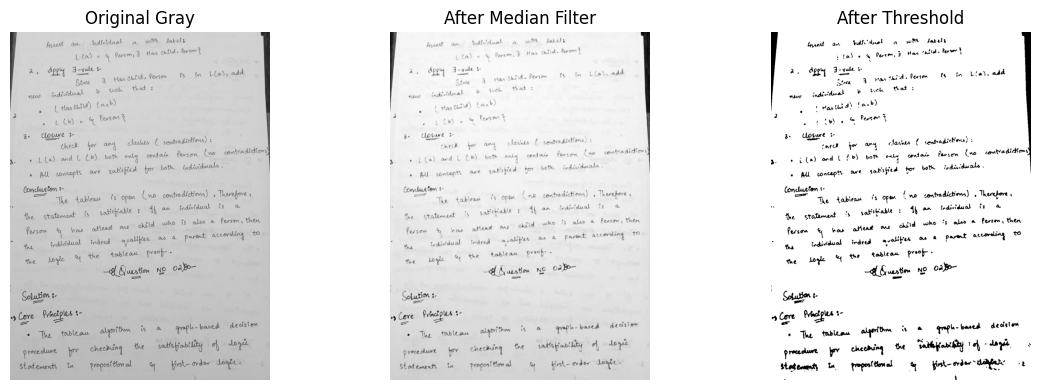

In [46]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Original Gray")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(1,3,2)
plt.title("After Median Filter")
plt.imshow(median, cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("After Threshold")
plt.imshow(thresh, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()

In [47]:
cv2.imwrite("D:/23108111/cleaned_output.jpg", thresh)
print("Cleaned image saved.")

Cleaned image saved.
